In [1]:
% matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
from scipy import stats
from numpy import linspace
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from mpl_toolkits.mplot3d import Axes3D


# Projeto 3 #

#### Artur Leão e Rafael Marzolla

In [2]:
dados_co2 = pd.read_excel("indicator CDIAC carbon_dioxide_emissions_per_capita.xlsx", sep = ",")
dados_PIB = pd.read_excel('indicatorwdigdp_percapita_growth.xlsx',sep = ",")
dados_Life = pd.read_excel("indicator life_expectancy_at_birth.xlsx", sep = ",")

In [3]:
dados_co2.head()

,CO2 per capita,1751,1755,1762,1763,1764,1765,1766,1767,1768,...,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.022704,0.027472,0.036780,0.047090,0.068312,0.131602,0.213325,0.262174,NaN,NaN
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.382066,1.332966,1.353789,1.224310,1.279420,1.297753,1.215055,1.336544,NaN,NaN
4,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.899236,2.762220,3.257010,3.113135,3.312875,3.328945,3.564361,3.480977,3.562504,3.785654


In [4]:
dados_PIB.head()

,GDP per capita growth (annual %),1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,11.121372,6.378216,11.313194,8.125680,8.072167,0.553042,17.084973,5.221090,NaN
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.487038,5.124225,5.284567,4.931197,4.507466,5.463726,7.302836,2.933549,3.103535,NaN
2,Algeria,NaN,-15.22747,-21.140919,31.832284,3.71389,3.818762,-7.193445,6.468873,7.605275,...,3.169443,5.320244,3.632891,3.526458,0.461979,1.436616,0.849121,0.870189,1.791822,NaN
3,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.806047,2.082227,2.116065,2.387630,4.134693,-0.461165,2.081963,NaN,NaN,NaN


In [5]:
dados_Life.head()

,Life expectancy,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,28.21,28.20,28.19,28.18,28.17,28.16,28.15,28.14,28.13,...,52.4,52.8,53.3,53.6,54.0,54.4,54.8,54.9,53.8,52.72
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,76.6,76.8,77.0,77.2,77.4,77.5,77.7,77.9,78.0,78.10
4,Algeria,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,...,75.3,75.5,75.7,76.0,76.1,76.2,76.3,76.3,76.4,76.50


In [6]:
dados_co22007 = dados_co2.iloc[0:,(0,248)].dropna()
dados_co22007.head()
dados_co22007.shape

(201, 2)

In [7]:
dados_PIB2007 = dados_PIB.iloc[0:,(0,48)].dropna()
dados_PIB2007.head()
dados_PIB2007.shape

(197, 2)

In [8]:
dados_Life2007 = dados_Life.iloc[0:,(0,208)].dropna()
dados_Life2007.head()
dados_Life2007.shape

(208, 2)

In [9]:
tabela_co2=dados_co22007
tabela_co2.columns = ["País","consumo_CO2"]

In [10]:
#tabela_co2

In [11]:
tabela_PIB=dados_PIB2007
tabela_PIB.columns = ["País","PIB"]

In [12]:
tabela_Life=dados_Life2007
tabela_Life.columns = ["País","Expectativa_de_vida"]

In [13]:
dados=tabela_co2

In [14]:
dados["PIB"] = tabela_PIB.PIB

In [15]:
dados["Expectativa_de_vida"] = tabela_Life.Expectativa_de_vida

In [16]:
dados.dropna(inplace=True)
dados

,País,consumo_CO2,PIB,Expectativa_de_vida
1,Afghanistan,0.068312,5.463726,52.40
4,Algeria,3.312875,-0.461165,75.30
6,Andorra,6.622435,9.389175,84.50
7,Angola,1.435044,7.703323,56.20
10,Argentina,4.582394,1.723146,75.20
11,Armenia,1.648352,3.304320,72.30
12,Aruba,22.620932,23.639133,74.62
13,Australia,17.859906,-0.032632,81.50
14,Austria,8.319712,-5.039402,80.10
15,Azerbaijan,4.695871,5.242513,69.10



### Suposição

A primeira suposição será feita como uma regressão múltipla, onde serão estabelecidos Coeficientes e seus respectivos P-Values para cada variavel utilizada. 

* Explicativas:** Expectativa de vida,     Consumo de CO2**
* Resposta: **PIB**

---
Utilizando o **Método dos Mínimos Quadrados** do *Stats Models* podemos tentar estabelecer uma equação que represente o fenômeno em estudo analisando o diagrama de dispersão. De acordo com as imagens, modelaremos equações de retas. O MMQ nos dará o mínimo de erro possível para isso.

In [19]:
X1 = dados[["Expectativa_de_vida","consumo_CO2"]].copy()
y1 = dados["PIB"].copy()

X1 = sm.add_constant(X1)

---
### Observação

Para ajustar o modelo utilizaremos o método **fit()**

In [21]:
est1 = sm.OLS(y1, X1).fit()

est1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    PIB   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.025
Date:                Wed, 09 Nov 2016   Prob (F-statistic):              0.361
Time:                        19:15:23   Log-Likelihood:                -384.94
No. Observations:                 140   AIC:                             775.9
Df Residuals:                     137   BIC:                             784.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
const                   8.0710      2.658      3.037      0.003         2.815    13.327
Expectativa_de_vida    -0.0515      0.038     -1.359      0.176        -0.126     0.023
consumo_CO2            -0.0098      0.042     -0.235      0.815        -0.093     0.073
==============================================================================
Omnibus:                       46.253   Durbin-Watson:                   2.147
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.936
Skew:                           1.206   Prob(JB):                     1.02e-33
Kurtosis:                       7.498   Cond. No.                         584.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
est1.params

const                  8.070953
Expectativa_de_vida   -0.051496
consumo_CO2           -0.009843
dtype: float64

---
### Interpretação



|Elemento 1 |Descrição|
|--|-------------------------------|
|**Dep Variable** |Variável Resposta do Modelo|
|**Model** |Modelo usado para regressão|
|**Method** |Como os parâmetros foram calculados|
|**Nº Observations** |Número de observações/amostras|
|**DF Residuals** |Graus de liberdade dos resíduos. Calculado por NºObservações-NºParâmetros|
|**DF Model** |Número de Parâmetros no modelo, não incluindo o termo constante|
|**R-Squared** |Coeficiente de determinação|
|**Adj. R-Squared** |Coeficiente de determinação ajustado|
|**F-Statistic** |Coeficiente de significância do ajuste|
|**Prob F-Statistic** |Probabilidade a ser obtida considerando a hipótese nula|
|**Log Likelihood** |Log da probabilidade de ocorrência da suposição|
|**AIC** |Ajuste do Log Likelihood baseado nas observações|
|**BIC** |Ajuste do Log Likelihood, mais preciso para modelos com mais parâmetros|


|Elemento 2 |Descrição|
|--|-------------------------------|
|**coef** |Valor estimado do coeficiente|
|**std err** |Desvio Padrão do erro da estimativa do coeficiente|
|**t** |Valor do Teste-T|
|**P > t** |Valor-P para o qual o coeficiente da hipótese nula é 0|
|**95.0% Conf. Interval** |Valorex extremos para um intervalo de confiança de 95%|
|**Skewness**|Medida da simetria da data a partir da média|
|**Kurtosis** |Medida da forma da distribuição|


|Elemento 3 |Descrição|
|--|-------------------------------|
|**Omnibus** |Teste de combinação da presença de Skewness e Kurtosis|
|**Prob(Omnibus)** |Estatística Omnibus transformada em probabilidade|
|**Jarque-Bera**|Outro teste de Skewness e Kurtosis|
|**Prob(JB)** |Estatística acima transformada em probabilidade|
|**Durbin-Watson** |Teste de autocorrelação|
|**Cond. Nº** |Teste de multicolinearidade|






---
### Elementos



* **R-Squared**: Coeficiente de Determinação. Medida estatística de quão boa a linha de regressão se aproxima dos dados reais. Um R²=1 indica um ajuste perfeito, enquanto um R²=0 indica nenhuma relação aparente. Sua equação é:

$$
R^2=1-(SSres/SStot)
$$


* **Adj. R-Squared**: Coeficiente de Determinação ajustado, seu valor será sempre igual ou menor do que R². É como uma regressão com a combinação ideal de ter o melhor ajuste sem termos desnecessários.  


* **F-Statistic**: Coeficiente de significância do ajuste, indica uma distribuição F sobre a hipótese nula. É utilizado em alguns casos:

> A hipótese de que populações de distribuição normal, todas com o mesmo desvio padrão, tem médias iguais. 
> A hipótese de uma regressão tal se ajusta aos dados bem. 


* **Log Likelihood**: É o logarítimo natural da função dos parâmetros de um modelo estatístico, chamado de *likelihood function*. É utilizado pois o logarítimo de uma função atinge os máximos nos mesmos pontos que a função. 


* **AIC**: Akaike Information Criterion, é uma medida da relação de qualidade de um modelo estatístico. Dado um conjunto de modelo para dados, o AIC estima a qualidade de cada um comparado aos outros. 


* **BIC**: Bayesian Information Criterion ou Schwarz Criterion é um critério para seleção de um modelo dentre um conjunto. É calculado com base no Likelihood Function e o AIC, sendo preferível um BIC baixo. Assim como o AIC, se relaciona com os parâmetros. 


* **t**: Valor T, mede quão estatísticamente significativo é o coeficiente. 


* **P > t**: Valor t, normalmente se é menor do que o nível de confiança 0.05, indica que existe uma relação significativa entre o modelo e o parâmetro. 


* **Skewness**: É uma medida da assimetria de uma distribuição de probabilidade de uma variável em relação à sua média. 


* **Kurtosis**: A curtose é uma medida de dispersão que caracteriza o achatamento da curva em função da distribuição de probabilidade. 

    * Se o valor da curtose for **= 0**, então tem o mesmo achatamento que a distribuição normal. 
    * Se o valor é **> 0**, então a distribuição em questão é mais afunilada e concentrada que a distribuição normal.
    * Se o valor é **< 0**, então a função de distribuição é mais "achatada" que a distribuição normal.
       

* **Omnibus**: Se refere a um certo tipo de teste estatístico como ANOVA, Teste F ou Chi-Quadrado. Avaliam se a variância explicada em um modelo de dados é significativamente maior do que a variância não explicada. Neste caso, é usado o Teste K² D'Agostino, avaliando se o grupo de dados deriva de uma distribuição normal, baseado nas transformações de Kurtosis e Skewness. 


* **Jarque-Bera**: Novamente, outro teste para saber se uma amostra de dados têm a Kurtosis e Skewness vindos de uma distribuição normal. 


* **Durbin-Watson**: Teste para detectar apresença de autocorrelação (relação entre valores separados pelo tempo) nos resíduos (erros preditórios) de uma análise de regressão. 




In [ ]:
'''# We pick 100 hundred points equally spaced from the min to the max
X_prime = np.linspace(dados.PIB.min(), dados.PIB.max(), 100)[:, np.newaxis]
X_prime = sm.add_constant(X_prime)  # Constante

# Now we calculate the predicted values
y_hat = est.predict(X_prime)

plt.scatter(dados.PIB, y, alpha=0.3)  # Plot dos datos brutos
plt.xlabel("PIB")
plt.ylabel("Expectativa de vida")
plt.plot(X_prime[:, 1], y_hat, 'r', alpha=0.9)  # Linha de regressão '''

In [ ]:
'''# We pick 100 hundred points equally spaced from the min to the max
X_prime = np.linspace(dados.consumo_CO2.min(), dados.consumo_CO2.max(), 100)[:, np.newaxis]
X_prime = sm.add_constant(X_prime)  # Constante

# Now we calculate the predicted values
y_hat = est.predict(X_prime)

plt.scatter(dados.consumo_CO2, y, alpha=0.3)  # Plot dos datos brutos
plt.xlabel("consumo CO2")
plt.ylabel("Expectativa de vida")
plt.plot(X_prime[:, 1], y_hat, 'r', alpha=0.9)  # Linha de regressão '''

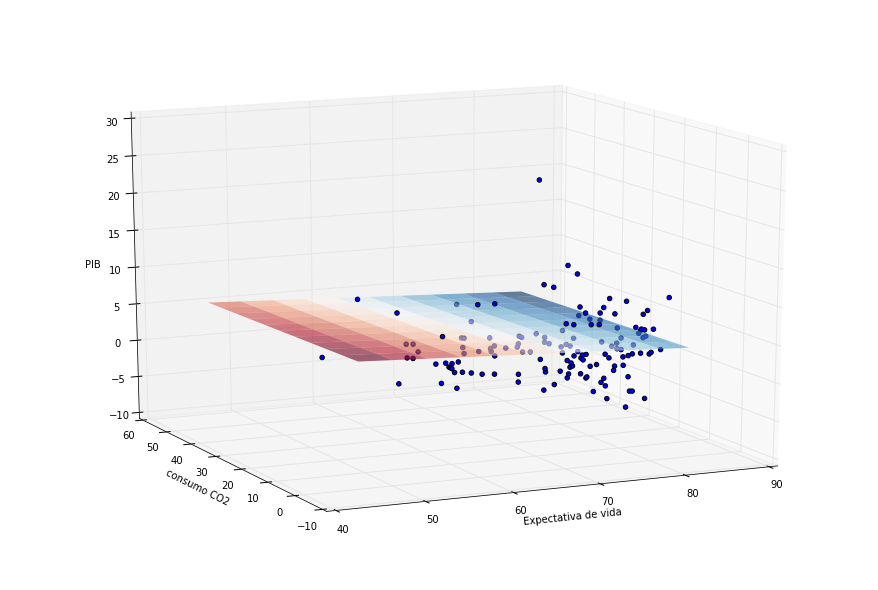

In [25]:
X1 = dados[["Expectativa_de_vida","consumo_CO2"]].copy()
y1 = dados["PIB"].copy()

X1 = sm.add_constant(X1)
#substitui suas paradas aqui deixa o xp e o yp que depois eu arrumo pra voce isso só muda o nome das variaveis
xx1, xx2 = np.meshgrid(np.linspace(X1.Expectativa_de_vida.min(), X1.Expectativa_de_vida.max(), 100), 
                       np.linspace(X1.consumo_CO2.min(), X1.consumo_CO2.max(), 100))
# plot the hyperplane by evaluating the parameters on the grid
Z1 = est1.params[0] + est1.params[1] * xx1 + est1.params[2] * xx2

# create matplotlib 3d axes
fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig, azim=-115, elev=15)

# plot hyperplane
surf = ax.plot_surface(xx1, xx2, Z1, cmap=plt.cm.RdBu_r, alpha=0.6, linewidth=0)

# plot data points - points over the HP are white, points below are black
resid = y1- est1.predict(X)
ax.scatter(X1[resid >= 0].Expectativa_de_vida, X1[resid >= 0].consumo_CO2, y1[resid >= 0], color='black', alpha=1.0, facecolor='white')
ax.scatter(X1[resid < 0].Expectativa_de_vida, X1[resid < 0].consumo_CO2, y1[resid < 0], color='black', alpha=1.0)

# set axis labels
ax.set_xlabel('Expectativa de vida')
ax.set_ylabel('consumo CO2')
ax.set_zlabel('PIB')